Loading data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

data = pd.read_csv("DataScience_salaries_2024.csv")

# Yearly Inflation Rates
inflation = [1.022, 1.017, 1.036, 1.062, 1.048]

# Calculate the inflation adjusted salary for each year
data.loc[data['work_year'] == 2019, 'salary_in_usd'] *= np.prod(inflation[0:4])
data.loc[data['work_year'] == 2020, 'salary_in_usd'] *= np.prod(inflation[1:4])
data.loc[data['work_year'] == 2021, 'salary_in_usd'] *= np.prod(inflation[2:4])
data.loc[data['work_year'] == 2022, 'salary_in_usd'] *= np.prod(inflation[3:4])
data.loc[data['work_year'] == 2023, 'salary_in_usd'] *= inflation[4]

data['salary_in_usd'] = data['salary_in_usd'].apply(np.round)

data.head(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,44051.0,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,39893.0,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,39985.0,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,85118.0,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,101300.0,IN,50,IN,L
5,2021,MI,FT,ML Engineer,7000000,JPY,70097.0,JP,50,JP,S
6,2021,SE,FT,Data Science Manager,7000000,INR,104153.0,IN,50,IN,L
7,2022,EN,FT,Data Scientist,6600000,HUF,18780.0,HU,100,HU,M
8,2022,EX,FT,Head of Machine Learning,6000000,INR,81040.0,IN,50,IN,L
9,2022,EN,FT,Research Engineer,5500000,JPY,44401.0,JP,50,JP,L


Basic information

In [22]:
print("Instances: " + str(data.shape[0]))
print("Attributes: " + str(data.shape[1]) +"\n")
data.info()
data.describe()

Instances: 14838
Attributes: 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           14838 non-null  int64  
 1   experience_level    14838 non-null  object 
 2   employment_type     14838 non-null  object 
 3   job_title           14838 non-null  object 
 4   salary              14838 non-null  int64  
 5   salary_currency     14838 non-null  object 
 6   salary_in_usd       14838 non-null  float64
 7   employee_residence  14838 non-null  object 
 8   remote_ratio        14838 non-null  int64  
 9   company_location    14838 non-null  object 
 10  company_size        14838 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.2+ MB


,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,155247.734398,32.760480
std,0.700799,3.562354e+05,71197.357472,46.488278
min,2020.000000,1.400000e+04,15930.000000,0.000000
25%,2023.000000,1.021000e+05,105700.000000,0.000000
50%,2023.000000,1.422000e+05,146720.000000,0.000000
75%,2024.000000,1.875000e+05,193880.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


There are 14838 instance and 11 attributes. There are 3 numerical attributes and 8 categorical attributes. There is no missing value.

<AxesSubplot:xlabel='job_title', ylabel='count'>

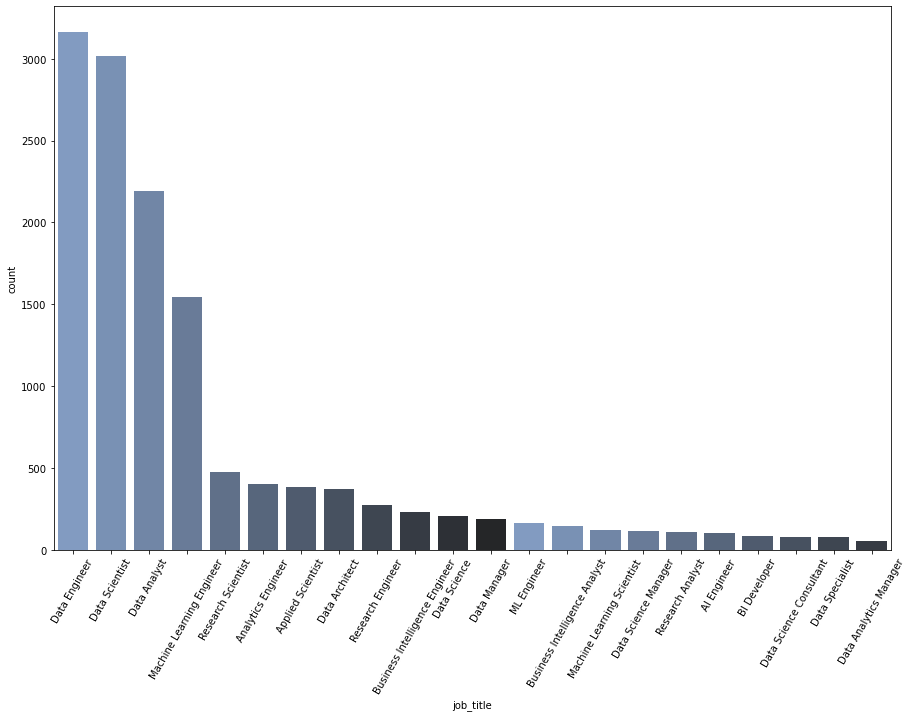

In [23]:
job_counts = data['job_title'].value_counts().reset_index()
job_counts.columns = ['job_title', 'count']

filtered_jobs = data[data['job_title'].isin(job_counts[job_counts['count'] > 50]['job_title'])]


plt.rc('xtick', labelsize=10)
plt.figure(figsize=(15, 10))
plt.xticks(rotation=60)
color = sns.dark_palette("#79C", n_colors=12, reverse=True)
sns.countplot(x="job_title", data=filtered_jobs, order=filtered_jobs['job_title'].value_counts().index, palette=color)

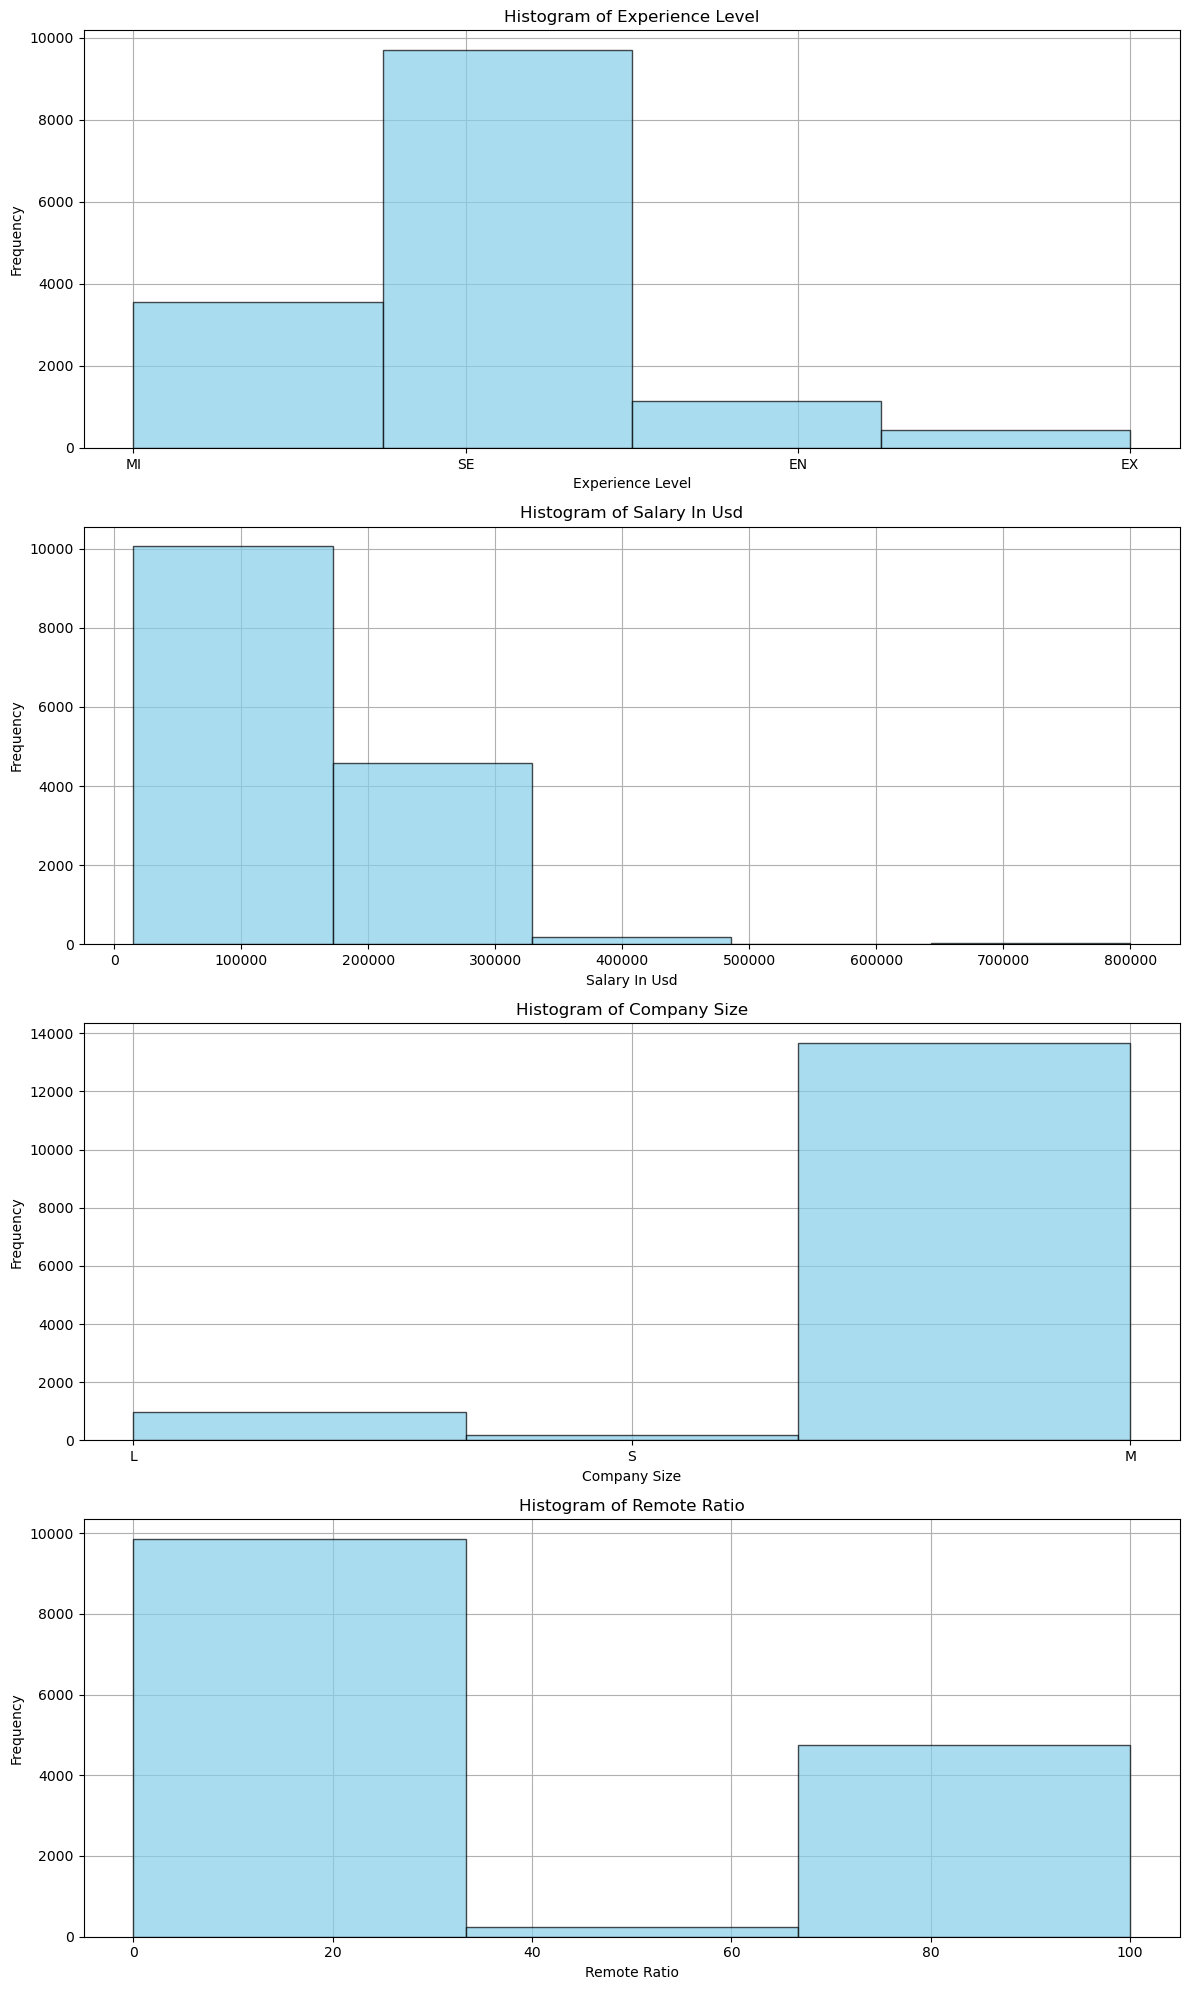

In [17]:
columns_to_plot = ['experience_level','salary_in_usd','company_size', 'remote_ratio']
bins = [4, 5, 3, 3]
num_plots = len(columns_to_plot)

fig, axs = plt.subplots(num_plots, 1, figsize=(12, num_plots * 5))

# Plot histograms using a for loop
for i, col in enumerate(columns_to_plot):
    axs[i].hist(data[col], bins=bins[i], color='skyblue', edgecolor='black', alpha=0.7)
    axs[i].set_xlabel(col.replace('_', ' ').title())
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col.replace("_", " ").title()}')
    axs[i].grid(True)  # Add grid lines
    axs[i].set_axisbelow(True)  # Ensure grid lines are behind bars

plt.tight_layout()
plt.show()

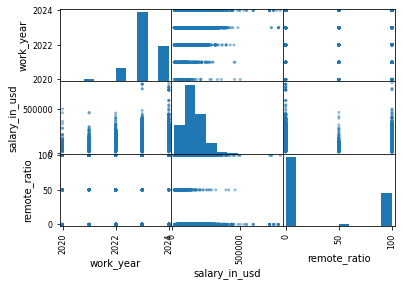

In [25]:
from pandas.plotting import scatter_matrix

attributes = ['work_year','salary_in_usd', 'remote_ratio']

scatter_matrix(data[attributes])
plt.show()

In [3]:
from sklearn.preprocessing import OrdinalEncoder

experience_level_cat = data[["experience_level"]]
categories = [['EN', 'MI', 'SE', 'EX']]
ordinal_encoder = OrdinalEncoder(categories=categories)
experience_level_cat_encoded = ordinal_encoder.fit_transform(experience_level_cat)

print("Encoded categories:", experience_level_cat_encoded)
print("Mapped categories:", ordinal_encoder.categories_)

Encoded categories: [[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
Mapped categories: [array(['EN', 'MI', 'SE', 'EX'], dtype=object)]


In [7]:
company_size_cat = data[["company_size"]]
categories = [['S', 'M', 'L']]
ordinal_encoder = OrdinalEncoder(categories=categories)
company_size_cat_encoded = ordinal_encoder.fit_transform(company_size_cat)

print("Encoded categories:", company_size_cat_encoded)
print("Mapped categories:", ordinal_encoder.categories_)

Encoded categories: [[2.]
 [2.]
 [2.]
 ...
 [2.]
 [2.]
 [0.]]
Mapped categories: [array(['S', 'M', 'L'], dtype=object)]


In [8]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

employee_residence_cat = data[['employee_residence']]
employee_residence_cat_encoded = one_hot_encoder.fit_transform(employee_residence_cat)

print("Encoded categories:", employee_residence_cat_encoded)
print("Mapped categories:", one_hot_encoder.categories_)

Encoded categories:   (0, 15)	1.0
  (1, 38)	1.0
  (2, 38)	1.0
  (3, 47)	1.0
  (4, 42)	1.0
  (5, 47)	1.0
  (6, 42)	1.0
  (7, 38)	1.0
  (8, 42)	1.0
  (9, 47)	1.0
  (10, 42)	1.0
  (11, 42)	1.0
  (12, 42)	1.0
  (13, 42)	1.0
  (14, 47)	1.0
  (15, 42)	1.0
  (16, 42)	1.0
  (17, 42)	1.0
  (18, 42)	1.0
  (19, 42)	1.0
  (20, 42)	1.0
  (21, 42)	1.0
  (22, 42)	1.0
  (23, 42)	1.0
  (24, 42)	1.0
  :	:
  (14813, 18)	1.0
  (14814, 30)	1.0
  (14815, 70)	1.0
  (14816, 34)	1.0
  (14817, 36)	1.0
  (14818, 67)	1.0
  (14819, 42)	1.0
  (14820, 70)	1.0
  (14821, 45)	1.0
  (14822, 45)	1.0
  (14823, 60)	1.0
  (14824, 34)	1.0
  (14825, 42)	1.0
  (14826, 55)	1.0
  (14827, 58)	1.0
  (14828, 58)	1.0
  (14829, 2)	1.0
  (14830, 25)	1.0
  (14831, 74)	1.0
  (14832, 21)	1.0
  (14833, 33)	1.0
  (14834, 60)	1.0
  (14835, 79)	1.0
  (14836, 39)	1.0
  (14837, 21)	1.0
Mapped categories: [array(['AD', 'AE', 'AM', 'AR', 'AS', 'AT', 'AU', 'BA', 'BE', 'BG', 'BO',
       'BR', 'CA', 'CF', 'CH', 'CL', 'CN', 'CO', 'CR', 'CY', 'CZ', 

In [9]:
company_location_cat = data[['company_location']]
company_location_cat_encoded = one_hot_encoder.fit_transform(company_location_cat)

print("Encoded categories:", company_location_cat_encoded)
print("Mapped categories:", one_hot_encoder.categories_)

Encoded categories:   (0, 14)	1.0
  (1, 74)	1.0
  (2, 34)	1.0
  (3, 42)	1.0
  (4, 38)	1.0
  (5, 42)	1.0
  (6, 38)	1.0
  (7, 34)	1.0
  (8, 38)	1.0
  (9, 42)	1.0
  (10, 38)	1.0
  (11, 38)	1.0
  (12, 38)	1.0
  (13, 38)	1.0
  (14, 42)	1.0
  (15, 35)	1.0
  (16, 18)	1.0
  (17, 38)	1.0
  (18, 74)	1.0
  (19, 38)	1.0
  (20, 38)	1.0
  (21, 38)	1.0
  (22, 38)	1.0
  (23, 38)	1.0
  (24, 38)	1.0
  :	:
  (14813, 74)	1.0
  (14814, 26)	1.0
  (14815, 63)	1.0
  (14816, 30)	1.0
  (14817, 32)	1.0
  (14818, 60)	1.0
  (14819, 38)	1.0
  (14820, 63)	1.0
  (14821, 74)	1.0
  (14822, 41)	1.0
  (14823, 54)	1.0
  (14824, 30)	1.0
  (14825, 38)	1.0
  (14826, 49)	1.0
  (14827, 52)	1.0
  (14828, 52)	1.0
  (14829, 66)	1.0
  (14830, 21)	1.0
  (14831, 66)	1.0
  (14832, 18)	1.0
  (14833, 28)	1.0
  (14834, 11)	1.0
  (14835, 71)	1.0
  (14836, 35)	1.0
  (14837, 18)	1.0
Mapped categories: [array(['AD', 'AE', 'AM', 'AR', 'AS', 'AT', 'AU', 'BA', 'BE', 'BR', 'BS',
       'CA', 'CF', 'CH', 'CL', 'CN', 'CO', 'CZ', 'DE', 'DK', 'DZ',

In [13]:
remote_ratio_cat = data[['remote_ratio']]
remote_ratio_cat_encoded = one_hot_encoder.fit_transform(remote_ratio_cat)

print("Encoded categories:", remote_ratio_cat_encoded)
print("Mapped categories:", one_hot_encoder.categories_)

Encoded categories:   (0, 2)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 2)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
  (15, 2)	1.0
  (16, 2)	1.0
  (17, 2)	1.0
  (18, 1)	1.0
  (19, 2)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 1)	1.0
  (24, 2)	1.0
  :	:
  (14813, 1)	1.0
  (14814, 1)	1.0
  (14815, 2)	1.0
  (14816, 2)	1.0
  (14817, 0)	1.0
  (14818, 0)	1.0
  (14819, 2)	1.0
  (14820, 2)	1.0
  (14821, 0)	1.0
  (14822, 1)	1.0
  (14823, 2)	1.0
  (14824, 2)	1.0
  (14825, 1)	1.0
  (14826, 0)	1.0
  (14827, 1)	1.0
  (14828, 1)	1.0
  (14829, 2)	1.0
  (14830, 2)	1.0
  (14831, 2)	1.0
  (14832, 1)	1.0
  (14833, 2)	1.0
  (14834, 0)	1.0
  (14835, 2)	1.0
  (14836, 0)	1.0
  (14837, 2)	1.0
Mapped categories: [array([  0,  50, 100])]
